In [1]:
import matplotlib.pyplot as plt
import pandas as pd

DATA_FILE_NAME = "PlottingData.csv"
df = pd.read_csv(DATA_FILE_NAME)
data_size=len(df)
df

,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,isPurebred,ReproductiveStatus
0,1,Dog,Male,Adolescent,Shetland Sheepdog Mix,Brown/White,0,Neutered
1,3,Cat,Female,Adolescent,Domestic Shorthair Mix,Cream Tabby,0,Neutered
2,0,Dog,Male,Adolescent,Pit Bull Mix,Blue/White,0,Neutered
3,2,Cat,Male,Baby,Domestic Shorthair Mix,Blue Cream,0,Intact
4,2,Dog,Male,Adolescent,Lhasa Apso/Miniature Poodle,Tan,0,Neutered
5,2,Dog,Female,Baby,Cairn Terrier/Chihuahua Shorthair,Black/Tan,0,Intact
6,2,Cat,Male,Baby,Domestic Shorthair Mix,Blue Tabby,0,Intact
7,2,Cat,Unknown,Baby,Domestic Shorthair Mix,Brown Tabby,0,Unknown
8,0,Dog,Female,Baby,American Pit Bull Terrier Mix,Red/White,0,Neutered
9,0,Dog,Female,Adolescent,Cairn Terrier,White,1,Neutered


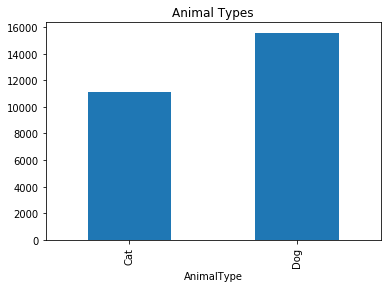

In [3]:
animalTypePlot = df.groupby("AnimalType")["AnimalType"].count().plot.bar(title = "Animal Types")
plt.savefig('Animal_Type_Counts.png',bbox_inches = "tight")

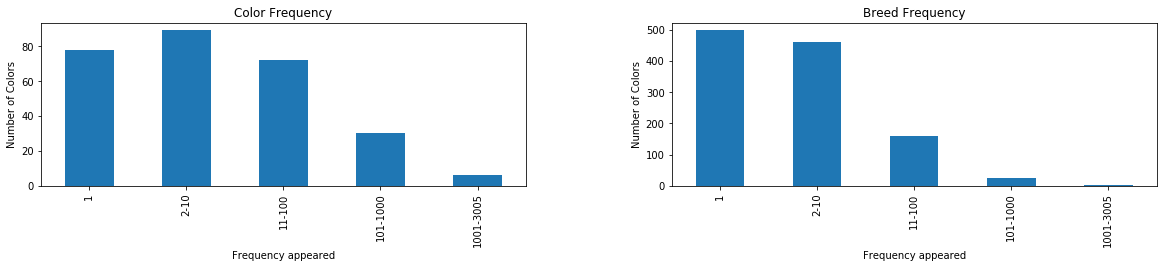

In [4]:
#color_types = df.groupby(['Color 1','Color 2'])['OutcomeType'].count().rename(columns={"OutcomeType":"Count"})
plt.rcParams["figure.figsize"] = (20,3)
plt.subplot(1,2,1)
color_types = df.groupby(['Color']).size()#.reset_index(name='counts')
data = pd.Series({'1': color_types[color_types == 1].count(),
        '2-10': color_types[(color_types >= 2) & (color_types <= 10)].count(),
        '11-100': color_types[(color_types >= 11) & (color_types <= 100)].count(),
        '101-1000': color_types[(color_types >= 101) & (color_types <= 1000)].count(),
        '1001-3005': color_types[(color_types > 1000)].count()
       })
colorPlot = data.plot.bar(title='Color Frequency')
colorPlot.set_ylabel('Number of Colors')
colorPlot.set_xlabel('Frequency appeared')

plt.subplot(1,2,2)
breed_types = df.groupby(['Breed']).size()#.reset_index(name='counts')
data = pd.Series({'1': breed_types[breed_types == 1].count(),
        '2-10': breed_types[(breed_types >= 2) & (breed_types <= 10)].count(),
        '11-100': breed_types[(breed_types >= 11) & (breed_types <= 100)].count(),
        '101-1000': breed_types[(breed_types >= 101) & (breed_types <= 1000)].count(),
        '1001-3005': breed_types[(breed_types > 1000)].count()
       })
breedPlot = data.plot.bar(title='Breed Frequency')
breedPlot.set_ylabel('Number of Colors')
breedPlot.set_xlabel('Frequency appeared')
plt.subplots_adjust(wspace=.3)
plt.savefig('Color_Breed.png',bbox_inches = "tight")

0 10769 0.4
1 4786 0.18
2 9422 0.35
3 1555 0.06
4 197 0.01


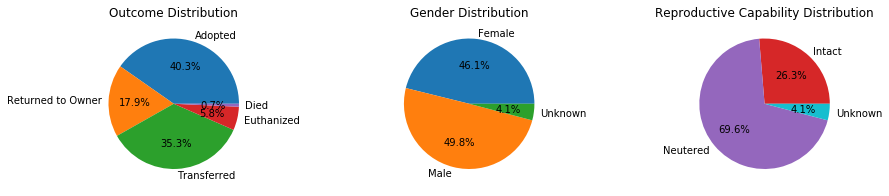

In [25]:
plt.rcParams["figure.figsize"] = (15,3)

plt.subplot(1,3,1)
outcome_types=df.groupby("OutcomeType")
for outcome in outcome_types.groups.keys():
    size=len(outcome_types.groups[outcome])
    print(outcome,size,round(size/data_size,2))
labels = ['Adopted','Returned to Owner','Transferred','Euthanized','Died']
outcomePlot = outcome_types['OutcomeType'].count().plot.pie(labels = labels,autopct = '%1.1f%%',title = "Outcome Distribution")
outcomePlot.set_ylabel('')
plt.savefig('Animal_Outcome_Counts.png',bbox_inches = "tight")


color1 = ['C0','C1','C2']
color2 = ['C3','C4','C9']
plt.subplot(1,3,2)
sex_types = df.groupby('SexuponOutcome')['SexuponOutcome'].count().plot.pie(colors = color1,autopct = '%1.1f%%', title = "Gender Distribution")
sex_types.set_ylabel('')
plt.subplot(1,3,3)
reproTypes = df.groupby('ReproductiveStatus')['ReproductiveStatus'].count().plot.pie(colors = color2,autopct = '%1.1f%%', title = "Reproductive Capability Distribution")
reproTypes.set_ylabel('')


plt.savefig('Outcome_Sex_ReproductiveStatus.png',bbox_inches = "tight")

,Age,Adopted,Returned to Owner,Transferred,Euthanized,Died
0,Adolescent,0.399870,0.202206,0.341047,0.053309,0.003568
1,Adult,0.314134,0.354629,0.248477,0.080008,0.002752
2,Baby,0.482432,0.028264,0.443810,0.032427,0.013067
3,Senior,0.241720,0.405339,0.189817,0.156204,0.006920


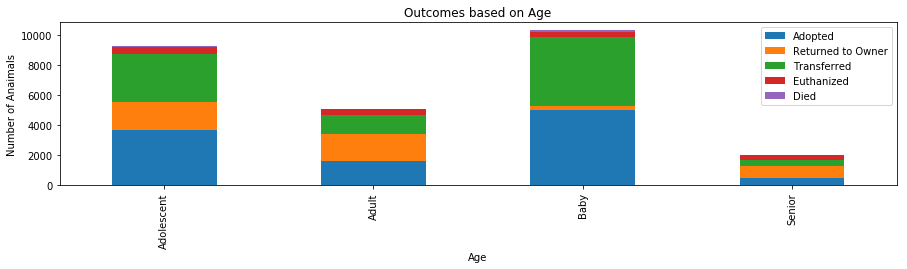

In [36]:
graph = df[df.AgeuponOutcome != 'Unknown'].groupby(['AgeuponOutcome', 'OutcomeType']).size().unstack().plot(kind='bar',title='Outcomes based on Age', stacked=True)
graph.legend(['Adopted','Returned to Owner','Transferred','Euthanized','Died'])
graph.set_xlabel('Age')
graph.set_ylabel('Number of Anaimals')
plt.savefig('Age_Outcome.png',bbox_inches = "tight")
c = df[df.AgeuponOutcome != 'Unknown'].groupby(['AgeuponOutcome', 'OutcomeType']).size().unstack()
c = c.div(c.sum(axis=1), axis=0).reset_index()
c.columns = ['Age','Adopted','Returned to Owner','Transferred','Euthanized','Died']
c